# Fill two-cell hole in iceshelf on east side of peninsula

Identified by Nico: (i, j ) =  ( 904:905, 281)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [21]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
domain_current = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20250715.nc')
bathy_current  = xr.open_dataset(f'{base_dir}bathymetry/bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20250715.nc')
ds_current     = xr.open_dataset(f'{base_dir}output/CESM2_3hwind_1920_t0_0955/files0/eANT025.L121_1m_19500101_19501231_icemod.nc')

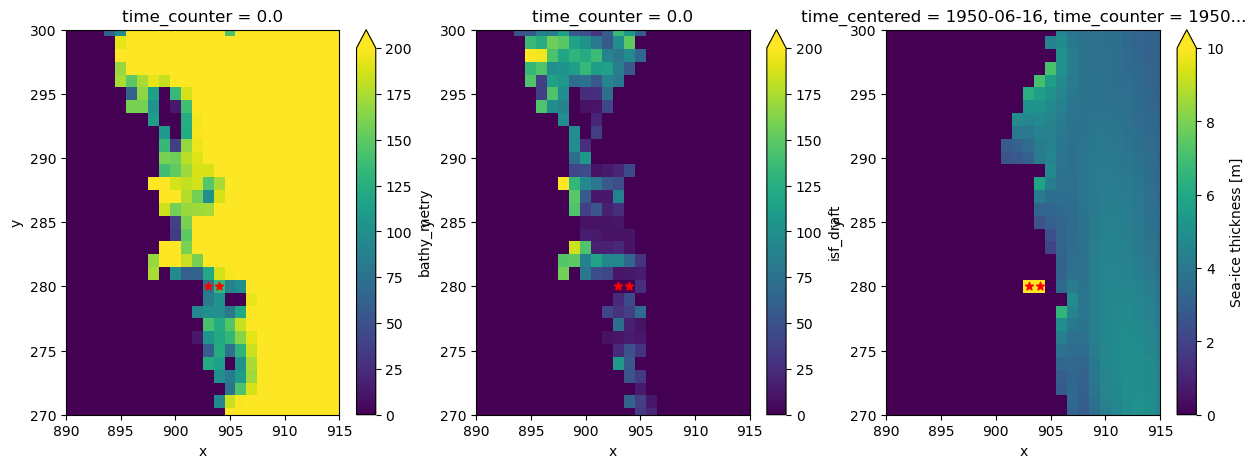

In [23]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
domain_current.bathy_metry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
domain_current.isf_draft.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
ds_current.sithic.isel(time_counter=5).plot(ax=ax[2], vmin=0, vmax=10, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

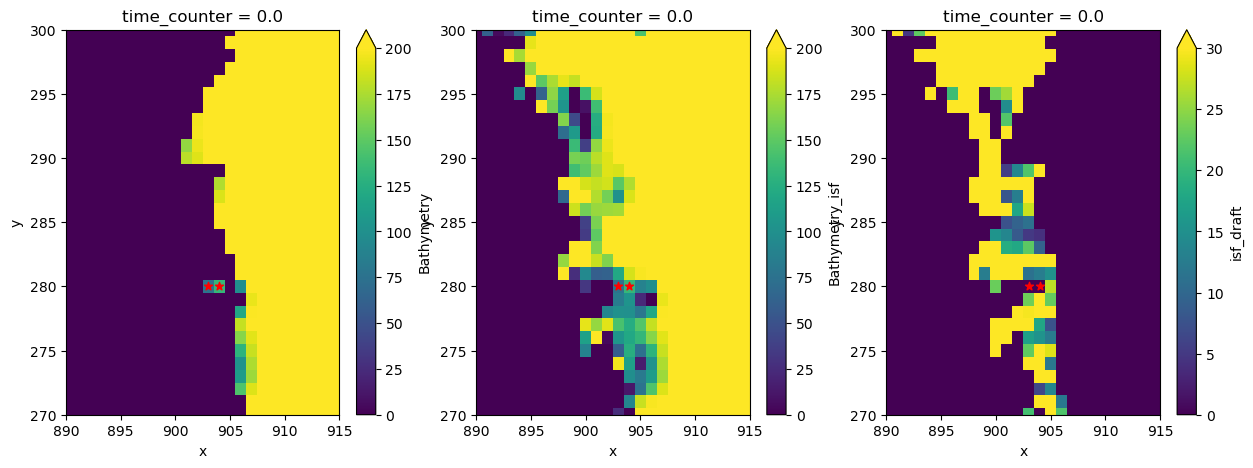

In [25]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
bathy_current.Bathymetry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
bathy_current.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
bathy_current.isf_draft.plot(ax=ax[2], vmin=0, vmax=30, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

In [29]:
print(bathy_current.Bathymetry.isel(x=904, y=280).values)
print(bathy_current.Bathymetry_isf.isel(x=904, y=280).values)
print(bathy_current.isf_draft.isel(x=904, y=280).values)

133.51256560319652
133.51256560319652
0.0


Fill two problematic cells (since it's connected to areas that are land, probably easiest to just make into land)

In [41]:
bathy_new = bathy_current.copy()

make_shelf = np.zeros(bathy_new['Bathymetry'].shape)
make_shelf[280, 903:905] = 1
bathy_new['Bathymetry'] = xr.where(make_shelf==1, 0, bathy_current['Bathymetry'])
bathy_new['Bathymetry_isf'] = xr.where(make_shelf==1, 0, bathy_current['Bathymetry_isf'])

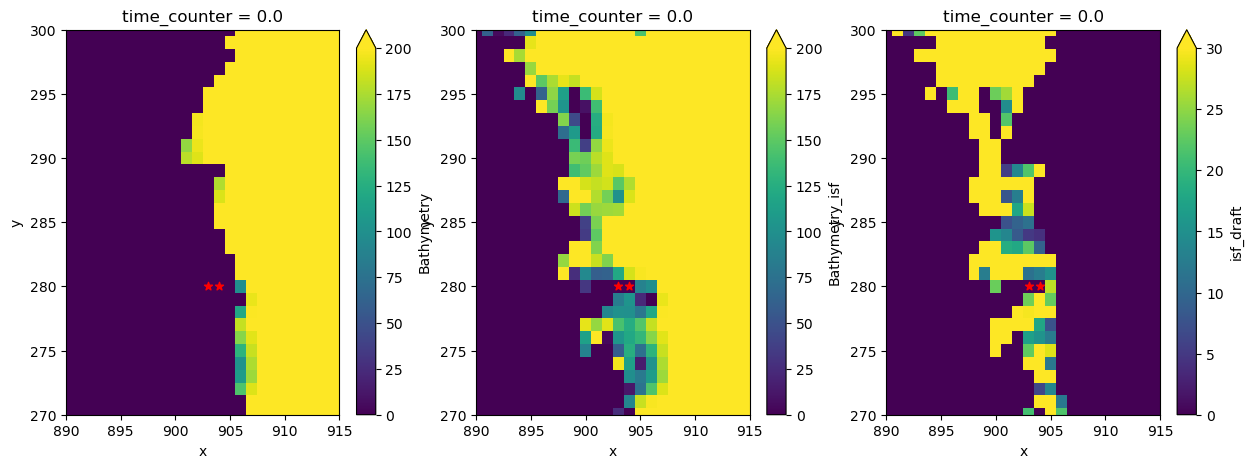

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
bathy_new.Bathymetry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
bathy_new.Bathymetry_isf.plot(ax=ax[1], vmin=0, vmax=200, **kwags)
bathy_new.isf_draft.plot(ax=ax[2], vmin=0, vmax=30, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')

In [43]:
bathy_new.to_netcdf(f'{base_dir}bathymetry/bathy_meter_eORCA025_BedMachine3_IBCSO_AIS-20260108.nc')

### Have a look at the new domain_cfg file generated by the NEMO DOMAINcfg tool:

In [44]:
domain_new = xr.open_dataset(f'{base_dir}bathymetry/domain_cfg-20260108.nc')

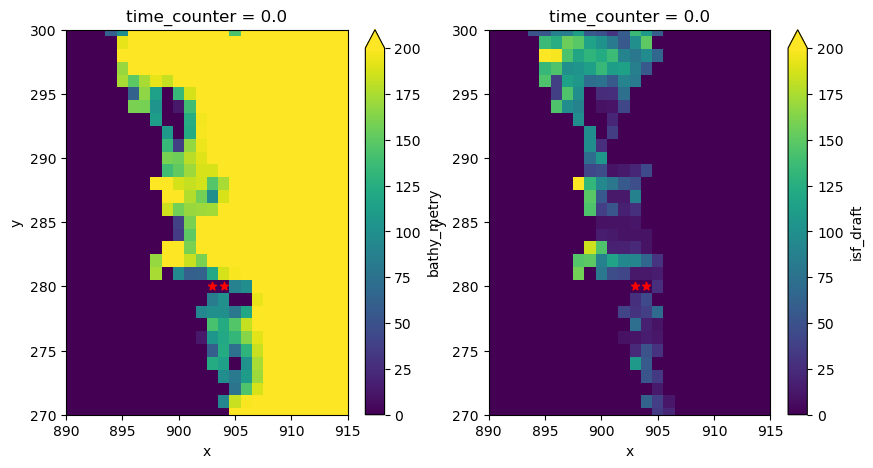

In [46]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
kwags = {'ylim':(270,300), 'xlim':(890,915)}
domain_new.bathy_metry.plot(ax=ax[0], vmin=0, vmax=200, **kwags)
domain_new.isf_draft.plot(ax=ax[1], vmin=0, vmax=200, **kwags)

for axis in ax.ravel():
    axis.scatter([903, 904], [280, 280], marker='*', color='r')